# Evaluación de un Modelo de Regresión Lineal

En esta lámina realizaremos un modelo de "regresión lineal" y se lo aplicaremos a un dataset llamado "Medical Costs Personal Dataset". Se trata de determinar qué tan bueno o malo es el modelo para predecir correctamente el costo de una aseguradora médica en base a ciertos parámetros.

In [1]:
# Importamos las librerías que utilizaremos
import pandas as pd
import numpy as np

In [2]:
# Leemos la tabla
insurance = pd.read_csv('C:\\Users\\Luis Carlos\\Documents\\CSVs\\insurance.csv')

In [3]:
# Mostramos la tabla
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


La tabla consta de las siguientes columnas, las cuales se refieren a:
- age: edad del beneficiario principal.
- sex: sexo del contratista de seguros (mujer u hombre).
- bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, pesos relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre la altura y el peso, idealmente 18,5 a 24,9.
- children: número de hijos cubiertos por el seguro médico / número de dependientes
- smoker: si es fumador o no.
- region: el área residencial del beneficiario en los EEUU.
- charges: costos médicos individuales facturados por el seguro médico.

Podemos observar que la tabla contiene 3 columnas categóricas (''sex, 'smoker' y 'region'). Para poder aplicar una regresión lineal es necesario que todas las columnas utilizadas sean numéricas.

En este caso convertiremos esas columnas categóricas a "variables dummies".

In [4]:
# Convertimos las columnas a variables dummies
sex_dummy = pd.get_dummies(insurance['sex'], prefix='sex')
smoker_dummy = pd.get_dummies(insurance['smoker'], prefix='smoker')
region_dummy = pd.get_dummies(insurance['region'], prefix='region')

In [5]:
# Agregamos estas nuevas columnas a la tabla principal
insurance = pd.concat([insurance, sex_dummy], axis=1)
insurance = pd.concat([insurance, smoker_dummy], axis=1)
insurance = pd.concat([insurance, region_dummy], axis=1)

In [6]:
# Mostramos las primeras 5 filas de la nueva tabla
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0,0,1,0,0


Ya se agregaron las columnas que convertimos a variables dummies. Ahora eliminaremos las columnas que fueron reemplazadas.

In [7]:
# Eliminamos columnas
insurance = insurance.drop(columns=['sex', 'smoker', 'region'])

In [8]:
# Mostramos la nueva tabla (primeras 5 filas)
insurance.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Ya tenemos nuestra tabla con valores totalmente numéricos.

In [9]:
# Mostramos las columnas de la tabla
insurance.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

Ahora, tenemos que predecir a 'charges' en base a todas las demás columnas.

Para ello, realizamos lo siguiente:

In [10]:
# Tomamos la columna objetivo en una variable y las columnas restantes en otra

variables_independientes = insurance[['age', 'bmi', 'children', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest']]
variable_objetivo = insurance['charges']

El siguiente paso es particionar la tabla en entrenamiento (train) y prueba (test).

In [11]:
# Importamos la librería necesaria
from sklearn.model_selection import train_test_split

In [12]:
# Particionamos el modelo

X_train, X_test, y_train, y_test = train_test_split(
     variables_independientes, variable_objetivo, test_size=0.20, random_state=42
)

(Se particionó la tabla en 80%  para entrenamiento y 20% para prueba)

In [13]:
print(X_train.shape, y_train.shape)

(1070, 11) (1070,)


In [14]:
print(X_test.shape, y_test.shape)

(268, 11) (268,)


La parte de entrenamiento consta de 1070 filas y 11 columnas, mientras que la de prueba consta de 268 filas y 11 columnas.

In [15]:
# Importamos las librerías para el modelo
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [16]:
# Preparamos el modelo
modelo_ols = LinearRegression()

In [17]:
# Ajustamos el modelo entrenándolo
modelo_ols.fit(X=X_train, y=y_train)

LinearRegression()

In [18]:
# Predecimos el entrenamiento
modelo_ols_train_preds = modelo_ols.predict(X_train)

In [19]:
# Funciones que utilizaremos

def rmse(objetivo, estimaciones):
    return np.sqrt(metrics.mean_squared_error(objetivo, estimaciones)
                  )

def adjusted_r2(objetivo, estimaciones, n, k):
    r2 = metrics.r2_score(objetivo, estimaciones)
    return 1 - (1-r2)*(n-1) / (n - k - 1)

def evaluar_modelo(objetivo, estimaciones, n, k):
    return {
        "rmse": rmse(objetivo, estimaciones),
        "mae": metrics.mean_absolute_error(objetivo, estimaciones),
        "adjusted_r2": adjusted_r2(objetivo, estimaciones, n, k)
           }

Guardaremos los resultados de entrenamiento y prueba.

In [20]:
RESULTADOS = {}
RESULTADOS["ols_train"] = evaluar_modelo(
    y_train,
    modelo_ols_train_preds,
    X_train.shape[0],
    len(modelo_ols.coef_)
)

In [21]:
{"intercepcion":modelo_ols.intercept_,"coeficientes":modelo_ols.coef_}

{'intercepcion': -574.5357125101928,
 'coeficientes': array([ 2.56975706e+02,  3.37092552e+02,  4.25278784e+02,  9.29584582e+00,
        -9.29584582e+00, -1.18255644e+04,  1.18255644e+04,  4.59585244e+02,
         8.89079180e+01, -1.98279052e+02, -3.50214110e+02])}

In [22]:
# Predecimos la prueba
modelo_ols_test_preds = modelo_ols.predict(X_test)

In [23]:
RESULTADOS["ols_test"] = evaluar_modelo(
    y_test,
    modelo_ols_test_preds,
    X_test.shape[0],
    len(modelo_ols.coef_)
)

In [24]:
# Mostramos los resultados
pd.DataFrame(RESULTADOS)

,ols_train,ols_test
rmse,6105.545160,5796.284659
mae,4208.234572,4181.194474
adjusted_r2,0.739040,0.774294


Para que pueda ser un buen modelo, el rmse (Root Mean Square Error) y el mae (Mean Absolute Error) deben ser próximos a 0, mientras que el adjusted_r2 debe aproximarse a 1.

Ahora, utilizaremos el método de validación cruzada para ver qué tan bueno (o malo) es el modelo.

In [25]:
# Importamos la validación cruzada
from sklearn.model_selection import cross_val_score

In [26]:
modelo_ols = LinearRegression()
X = variables_independientes
y = variable_objetivo

resultados_validación_cruzada = cross_val_score(
    estimator=modelo_ols, 
    X=X,
    y=y,
    scoring="neg_mean_squared_error", 
    cv=10
)

(cv=10 indica que se realizarán 10 validaciones cruzadas)

In [27]:
# Resultados de las 10 validaciones cruzadas
resultados_validación_cruzada

array([-35716658.04732662, -38381281.27037519, -37057636.48249165,
       -39345631.13363853, -38601854.25919384, -26605717.96978864,
       -30756063.66520091, -48492535.93933604, -33326478.89889572,
       -41618396.00252399])

In [28]:
# Promedio de las validaciones
resultados_validación_cruzada.mean()

-36990225.366877116

In [29]:
def rmse_cross_val(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.sqrt(metrics.mean_squared_error(y, y_pred))

In [30]:
# Realizamos la validación cruzada para 10, 11... hasta 200

resultados_cv = []
for i in range(10,200):
    cv_rmse = cross_val_score(
        estimator=modelo_ols, 
        X=X,
        y=y,
        scoring=rmse_cross_val, 
        cv=i
    ).mean()
    resultados_cv.append(cv_rmse)

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

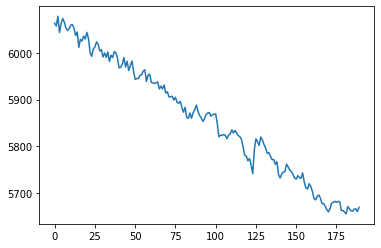

In [32]:
# Observamos los resultados de las validaciones
plt.plot(resultados_cv)

In [33]:
# Evaluamos qué tan bueno (o malo) fue el modelo
from sklearn.model_selection import cross_validate
scoring = {"mae": "neg_mean_absolute_error", "rmse": rmse_cross_val}
estimator = modelo_ols
scores = cross_validate(estimator, variables_independientes,
                        variable_objetivo, scoring=scoring,
                         cv=150, return_train_score=True)

In [34]:
# Observamos los resultados
pd.DataFrame(scores).mean()

fit_time         0.008828
score_time       0.008318
test_mae     -4204.000225
train_mae    -4170.883092
test_rmse     5731.933270
train_rmse    6041.510319
dtype: float64

Lo ideal sería que los valores de test_mae, train_mae, test_rmse y train_rmse fueran próximos a 0. Esto quiere decir que cuando un nuevo dato llegue, el modelo te arrojará una predicción del costo del seguro (en dólares, ya que esta tabla es de los EEUU) con un error de ± 4000, ± 5000 o ± 6000 aproximadamente.

In [35]:
import seaborn as sns

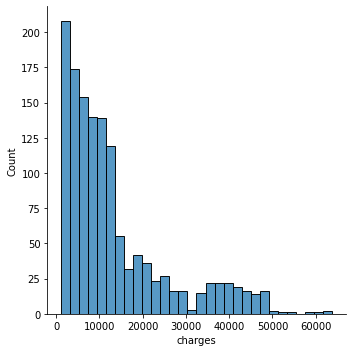

In [36]:
# Visualizamos cómo se distribuyen los valores de la columna 'charges'
sns.displot(insurance['charges'])

Tomando en cuenta que el aseguramiento de la mayoría de las personas ronda entre los 1000 y 15000 dólares, y que tenemos un error de ± 5000 (en promedio), podemos determinar que el modelo no resultó muy bueno.